## Imports

In [1]:
# Basic Imports
import random
import datetime
import sys

import pandas            as pd
import numpy             as np

# Data Reading
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

# Custom Modules
sys.path.append('/content/drive/MyDrive/Data Sets/')
import graphs
import plotly_graphs as pg

# Visuals
from warnings        import filterwarnings
from IPython.display import display, HTML

# Set seed for np random
SEED = 42
np.random.seed(SEED)

Mounted at /content/drive/


## Notebook Customization

In [2]:
# Hiding Warnings
filterwarnings('ignore')

# Set seed for np random
np.random.seed(42)

# Making the notebook wider
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline

## Table Of Contents


- [Loading Data](#Loading-Data)
- [Part 1 - Exploration](#Exploration)
- [Part 2 - Data Cleaning](#Data-Cleaning)
    - [Updating Data Type](#Updating-Data-Type)
    - [Mapping Values](#Mapping-Values)
    - [Creating A Single Target Variable](#Creating-A-Single-Target-Variable)
- [Part 3 - Visualization](#Visualization)
    - [Reading In Cleaned Data](#Reading-In-Cleaned-Data)
    - [Visual - Experiment](#Experiment)
    - [Visual - Experiment By Response](#Experiment-By-Response)
    - [Visual - Response](#Respone)
    - [Visual - Experiment Date](#Experiment-Date)
    - [Visual - Experiment Hour](#Experiment-Hour)
    - [Visual - Device Make](#Device-Make)
    - [Visual - Operating System](#Operating-System)
    - [Visual - Browser](#Browser)


<a id="1"></a>

## Loading Data

In [3]:
# Reading in the data set from Google Drive
ab_df = pd.read_csv('/content/drive/MyDrive/Data Sets/AdSmartABdata.csv')

<a id="2"></a>
## Part 1 - Exploration

In [4]:
# Head 5 rows
ab_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


Just looking at the dataframe's head, we can immediately see a problem: there are `auction_id` values that did not respond. In addition to the size of the overall dataframe, we need to know how many did not respond.

In [5]:
# Checking the shape of the data

print(f'The shape of the mri set is: {ab_df.shape[0]} rows by {ab_df.shape[1]} columns.')

The shape of the mri set is: 8077 rows by 9 columns.


In [6]:
response    = ab_df[(ab_df["yes"] == 1) | (ab_df["no"] == 1)]
nonresponse = ab_df[(ab_df["yes"] == 0) & (ab_df["no"] == 0)]

print(f"We have {response.shape[0]} responses and {nonresponse.shape[0]} non-responses.")

We have 1243 responses and 6834 non-responses.


This isn't great: only 1,243 or ~15% of the overall data set actually responded. For the purpose of these additional visualizations, we will label the non-respondents as such.

In [7]:
# Getting the data types

ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [8]:
# Summary of the data types

ab_df.dtypes.value_counts()

,count
object,5
int64,4


In [9]:
# Checking for null/missing values

ab_df.isnull().sum()

,0
auction_id,0
experiment,0
date,0
hour,0
device_make,0
platform_os,0
browser,0
yes,0
no,0


In [10]:
# Looking At `experiment` value counts
ab_df["auction_id"].nunique()

8077

In [11]:
# Looking At `experiment` value counts
ab_df["experiment"].value_counts()

,count
experiment,
control,4071
exposed,4006


This works out to ~53% exposed, ~47% control which is close enough to a 50:50 split.

In [12]:
# Looking At `date` value counts
ab_df["date"].value_counts()

,count
date,
2020-07-03,2015
2020-07-09,1208
2020-07-08,1198
2020-07-04,903
2020-07-10,893
2020-07-05,890
2020-07-06,490
2020-07-07,480


The experiment ran for a total of 8 days. Ideally, we would have ~14 days of  but we can't o anything about that.

In [13]:
# Looking At `hour` value counts
ab_df["hour"].value_counts()

,count
hour,
15,1895
8,394
7,381
9,346
10,336
16,335
6,327
14,319
5,302


In [14]:
# Looking At `device_make` value counts
ab_df["device_make"].value_counts()

,count
device_make,
Generic Smartphone,4743
iPhone,433
Samsung SM-G960F,203
Samsung SM-G973F,154
Samsung SM-G950F,148
...,...
Samsung SM-G9730,1
Samsung SM-G955U1,1
XiaoMi Redmi S2,1


There's a long tail of devices, which we'll clean up.

In [15]:
# Looking At `platform_os` value counts
ab_df["platform_os"].value_counts()

,count
platform_os,
6,7648
5,428
7,1


The authors did not provide what OS's `5`, `6`, `7` correspond to.

These values appear to be categories, so we won't change them.

In [16]:
ab_df.isnull().sum()

,0
auction_id,0
experiment,0
date,0
hour,0
device_make,0
platform_os,0
browser,0
yes,0
no,0


[Section Top](#Exploration)

[Top](#Table-Of-Contents)

<a id="3"></a>
## Data Cleaning

<a id="3a"></a>
### Updating Data Type

In [17]:
# Converting the `date` column to a datetime type
ab_df["date"] = pd.to_datetime(ab_df["date"])

<a id="3b"></a>
### Mapping Values

In [18]:
# Defining our dictionaries for mapping

# Dictionaries For Data Mapping
browser_dict = {"Android":"Other","Chrome":"Chrome","Chrome Mobile":"Chrome","Chrome Mobile iOS":"Chrome","Chrome Mobile WebView":"Chrome",
                "Edge Mobile":"Other","Facebook":"Facebook","Firefox Mobile":"Other","Mobile Safari":"Safari",
                "Mobile Safari UI/WKWebView":"Safari","Opera Mini":"Other","Opera Mobile":"Other","Pinterest":"Other","Puffin":"Other",
                "Samsung Internet":"Samsung Internet"}

# Mapping device type to manufacturer
# We'll rework this later
device_dict  = {"Nexus 5":"Google","Pixel 2":"Google","Pixel 3":"Google","Pixel 3a":"Google","Pixel 4":"Google","Pixel XL":"Google",
                "ALE-L21":"Huawei","ANE-LX1":"Huawei","ATU-L11":"Huawei","BLA-L09":"Huawei","CLT-L09":"Huawei","CLT-L29":"Huawei",
                "DUB-LX1":"Huawei","ELE-L09":"Huawei","ELE-L29":"Huawei","EML-L09":"Huawei","EML-L29":"Huawei","EVA-L09":"Huawei",
                "EVR-N29":"Huawei","FIG-LX1":"Huawei","HUAWEI $2":"Huawei","Huawei Browser":"Huawei","LDN-L01":"Huawei","LYA-L09":"Huawei",
                "LYA-L29":"Huawei","MAR-LX1A":"Huawei","MHA-L09":"Huawei","MRD-LX1":"Huawei","POT-LX1":"Huawei","PRA-LX1":"Huawei",
                "RNE-L21":"Huawei","SNE-LX1":"Huawei","VCE-L22":"Huawei","VKY-L09":"Huawei","VOG-L09":"Huawei","VOG-L29":"Huawei",
                "VTR-L09":"Huawei","WAS-LX1A":"Huawei","YAL-L21":"Huawei","iPhone":"iPhone","Lumia 950":"Nokia","Nokia undefined$2$3":"Nokia",
                "Nokia$2$3":"Nokia","TA-1020":"Nokia","TA-1024":"Nokia","TA-1033":"Nokia","Generic Smartphone":"Non Specified","A0001":"OnePlus",
                "OnePlus ONE A2003":"OnePlus","OnePlus ONE E1003":"OnePlus","OnePlus ONEPLUS A3000":"OnePlus","OnePlus ONEPLUS A3003":"OnePlus",
                "OnePlus ONEPLUS A5000":"OnePlus","OnePlus ONEPLUS A5010":"OnePlus","OnePlus ONEPLUS A6000":"OnePlus",
                "OnePlus ONEPLUS A6003":"OnePlus","OnePlus ONEPLUS A6013":"OnePlus","5008Y_EEA":"Other","5099Y":"Other","6039Y":"Other",
                "X4_Soul_Infinity_Z":"Other","Asus I01WD":"Other","BBB100-2":"Other","BBF100-1":"Other","CUBOT_X18_Plus":"Other",
                "Doro 8030":"Other","BKL-L09":"Other","COL-L29":"Other","COR-L29":"Other","DLI-L22":"Other","DUA-L22":"Other","FRD-L09":"Other",
                "NEM-L51":"Other","PCT-L29":"Other","PLK-L01":"Other","STF-L09":"Other","HTC 10":"Other","HTC Desire $2":"Other","HTC M10h":"Other",
                "HTC One":"Other","HTC One $2":"Other","HTC U11":"Other","HTC U11 $2":"Other","HTC U12+":"Other","IMO $2":"Other",
                "Lenovo A1010a20":"Other","Lenovo A7020a48":"Other","Lenovo P2a42":"Other","K7":"Other","LG-$2":"Other","Moto $2":"Other",
                "moto e5 play":"Other","moto e5 plus":"Other","Moto$2":"Other","XT1032":"Other","XT1580":"Other","CPH1851":"Other","C2105":"Other",
                "C6903":"Other","D5503":"Other","D5803":"Other","D6503":"Other","D6603":"Other","E5823":"Other","E6653":"Other","F3111":"Other",
                "F3311":"Other","F5321":"Other","F8331":"Other","G3121":"Other","G3221":"Other","G3311":"Other","H3113":"Other","H3311":"Other",
                "I3312":"Other","Armor_3":"Other","X13":"Other","VF-795":"Other","VF-895N":"Other","VFD 500":"Other","VFD 610":"Other",
                "VFD 700":"Other","VFD 710":"Other","VFD 720":"Other","VFD 820":"Other","Vodafone $2":"Other","Swift 2 Plus":"Other",
                "Wileyfox Swift":"Other","XiaoMi MI 6":"Other","XiaoMi MI 8":"Other","XiaoMi MI 8 Pro":"Other","XiaoMi MI MAX 3":"Other",
                "XiaoMi Redmi 3S":"Other","XiaoMi Redmi 5 Plus":"Other","XiaoMi Redmi 6":"Other","XiaoMi Redmi 6A":"Other","XiaoMi Redmi 8":"Other",
                "XiaoMi Redmi Note 4":"Other","XiaoMi Redmi Note 5":"Other","XiaoMi Redmi Note 6 Pro":"Other","XiaoMi Redmi Note 7":"Other",
                "XiaoMi Redmi Note 8":"Other","XiaoMi Redmi Note 8 Pro":"Other","XiaoMi Redmi Note 8T":"Other","XiaoMi Redmi S2":"Other",
                "S8":"Samsung","Samsung $2":"Samsung","Samsung GT-I8200N":"Samsung","Samsung GT-I9195":"Samsung","Samsung GT-I9195I":"Samsung",
                "Samsung GT-I9300":"Samsung","Samsung GT-I9505":"Samsung","Samsung GT-P5210":"Samsung","Samsung SM-A015M":"Samsung",
                "Samsung SM-A105F":"Samsung","Samsung SM-A105FN":"Samsung","Samsung SM-A105G":"Samsung","Samsung SM-A107F":"Samsung",
                "Samsung SM-A202F":"Samsung","Samsung SM-A205F":"Samsung","Samsung SM-A205G":"Samsung","Samsung SM-A207F":"Samsung",
                "Samsung SM-A217F":"Samsung","Samsung SM-A300FU":"Samsung","Samsung SM-A305F":"Samsung","Samsung SM-A310F":"Samsung",
                "Samsung SM-A320FL":"Samsung","Samsung SM-A405FN":"Samsung","Samsung SM-A415F":"Samsung","Samsung SM-A500FU":"Samsung",
                "Samsung SM-A505F":"Samsung","Samsung SM-A505FN":"Samsung","Samsung SM-A507FN":"Samsung","Samsung SM-A510F":"Samsung",
                "Samsung SM-A515F":"Samsung","Samsung SM-A520F":"Samsung","Samsung SM-A530F":"Samsung","Samsung SM-A600FN":"Samsung",
                "Samsung SM-A605F":"Samsung","Samsung SM-A605G":"Samsung","Samsung SM-A700F":"Samsung","Samsung SM-A705FN":"Samsung",
                "Samsung SM-A715F":"Samsung","Samsung SM-A750FN":"Samsung","Samsung SM-A750GN":"Samsung","Samsung SM-A805F":"Samsung",
                "Samsung SM-A908B":"Samsung","Samsung SM-A920F":"Samsung","Samsung SM-C9000":"Samsung","Samsung SM-F907B":"Samsung",
                "Samsung SM-G361F":"Samsung","Samsung SM-G388F":"Samsung","Samsung SM-G390F":"Samsung","Samsung SM-G570F":"Samsung",
                "Samsung SM-G6100":"Samsung","Samsung SM-G610F":"Samsung","Samsung SM-G770F":"Samsung","Samsung SM-G800F":"Samsung",
                "Samsung SM-G850F":"Samsung","Samsung SM-G900F":"Samsung","Samsung SM-G900T":"Samsung","Samsung SM-G900V":"Samsung",
                "Samsung SM-G901F":"Samsung","Samsung SM-G903F":"Samsung","Samsung SM-G920F":"Samsung","Samsung SM-G925F":"Samsung",
                "Samsung SM-G925I":"Samsung","Samsung SM-G928F":"Samsung","Samsung SM-G930F":"Samsung","Samsung SM-G930L":"Samsung",
                "Samsung SM-G930T":"Samsung","Samsung SM-G930U":"Samsung","Samsung SM-G930V":"Samsung","Samsung SM-G935F":"Samsung",
                "Samsung SM-G935U":"Samsung","Samsung SM-G950F":"Samsung","Samsung SM-G950U":"Samsung","Samsung SM-G950U1":"Samsung",
                "Samsung SM-G955F":"Samsung","Samsung SM-G955U":"Samsung","Samsung SM-G955U1":"Samsung","Samsung SM-G960F":"Samsung",
                "Samsung SM-G960U":"Samsung","Samsung SM-G960U1":"Samsung","Samsung SM-G965F":"Samsung","Samsung SM-G965U1":"Samsung",
                "Samsung SM-G970F":"Samsung","Samsung SM-G9730":"Samsung","Samsung SM-G973F":"Samsung","Samsung SM-G973U":"Samsung",
                "Samsung SM-G975F":"Samsung","Samsung SM-G977B":"Samsung","Samsung SM-G980F":"Samsung","Samsung SM-G981B":"Samsung",
                "Samsung SM-G986B":"Samsung","Samsung SM-G986U1":"Samsung","Samsung SM-G988B":"Samsung","Samsung SM-J250F":"Samsung",
                "Samsung SM-J260F":"Samsung","Samsung SM-J320FN":"Samsung","Samsung SM-J330F":"Samsung","Samsung SM-J330FN":"Samsung",
                "Samsung SM-J330G":"Samsung","Samsung SM-J415FN":"Samsung","Samsung SM-J500FN":"Samsung","Samsung SM-J510FN":"Samsung",
                "Samsung SM-J510GN":"Samsung","Samsung SM-J530F":"Samsung","Samsung SM-J600FN":"Samsung","Samsung SM-J610FN":"Samsung",
                "Samsung SM-J610G":"Samsung","Samsung SM-J701F":"Samsung","Samsung SM-J710F":"Samsung","Samsung SM-J710MN":"Samsung",
                "Samsung SM-J730F":"Samsung","Samsung SM-J810F":"Samsung","Samsung SM-N770F":"Samsung","Samsung SM-N910F":"Samsung",
                "Samsung SM-N920I":"Samsung","Samsung SM-N9500":"Samsung","Samsung SM-N950F":"Samsung","Samsung SM-N960F":"Samsung",
                "Samsung SM-N960U1":"Samsung","Samsung SM-N970F":"Samsung","Samsung SM-N9750":"Samsung","Samsung SM-N975F":"Samsung",
                "Samsung SM-N976B":"Samsung","Samsung SM-N976V":"Samsung","Samsung undefined$2":"Samsung"}

In [19]:
# Mapping values for the `browser`, `device_make`
# We decided to create new columns for these as we're not running the test on this data set

ab_df["browser_clean"]     = ab_df["browser"].map(browser_dict, na_action="ignore")
ab_df["device_clean"] = ab_df["device_make"].map(device_dict, na_action="ignore")

In [20]:
ab_df["device_clean"].value_counts()

,count
device_clean,
Non Specified,4743
Samsung,2110
iPhone,433
Huawei,293
Other,226
Nokia,131
Google,79
OnePlus,62


In [21]:
ab_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,browser_clean,device_clean
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,Chrome,Non Specified
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,Chrome,Non Specified
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,Chrome,Other
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,Facebook,Samsung
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Chrome,Non Specified


<a id="3c"></a>
### Creating A Single Target Variable

In [22]:
ab_df[(ab_df["yes"] == 1) & (ab_df["no"] == 1)]

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,browser_clean,device_clean


We can see that there aren't any erroneous rows that have `1` for both `yes` and `no`.

In [23]:
conditions = [ab_df["no"] == 1,
              ab_df["yes"] == 1,
              (ab_df["yes"] == 0) & (ab_df["no"] == 0)]

values = [0,1,99]

ab_df["response"] = np.select(conditions,values)
ab_df["response"] = ab_df["response"].map({0:"No",1:"Yes",99:"Non Response"})

In [24]:
# Checking our results
ab_df["response"].value_counts()

,count
response,
Non Response,6834
No,671
Yes,572


Cross referencing our results from above:

> We have 1243 responses and 6834 non-responses.

Our mapping worked correctly

In [25]:
# Saving to a new .csv and resetting the index
ab_df.to_csv("/content/drive/MyDrive/Data Sets/ab_full_cleaned_data.csv",index=False)

[Section Top](#Exploration)

[Top](#Table-Of-Contents)

<a id="4"></a>
## Visualization

<a id="4a"></a>
### Reading In Cleaned Data

In [26]:
ab = pd.read_csv("/content/drive/MyDrive/Data Sets/ab_full_cleaned_data.csv")

In [27]:
# Checking the layout
ab.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,browser_clean,device_clean,response
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,Chrome,Non Specified,Non Response
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,Chrome,Non Specified,Non Response
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,Chrome,Other,No
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,Facebook,Samsung,Non Response
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,Chrome,Non Specified,Non Response


In [28]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   auction_id     8077 non-null   object
 1   experiment     8077 non-null   object
 2   date           8077 non-null   object
 3   hour           8077 non-null   int64 
 4   device_make    8077 non-null   object
 5   platform_os    8077 non-null   int64 
 6   browser        8077 non-null   object
 7   yes            8077 non-null   int64 
 8   no             8077 non-null   int64 
 9   browser_clean  8077 non-null   object
 10  device_clean   8077 non-null   object
 11  response       8077 non-null   object
dtypes: int64(4), object(8)
memory usage: 757.3+ KB


In [29]:
# The date column reverted to an object, so we'll force to datetime again
ab["date"] = pd.to_datetime(ab["date"])

<a id="4b"></a>
### Experiment

In [30]:
# pg.color_scheme(c_type="complimentary")

# The complimentary colors are: rgb(31,119,180) & rgb(180,93,31).
# The complimentary colors are: #1F77B4, #B45D1F.

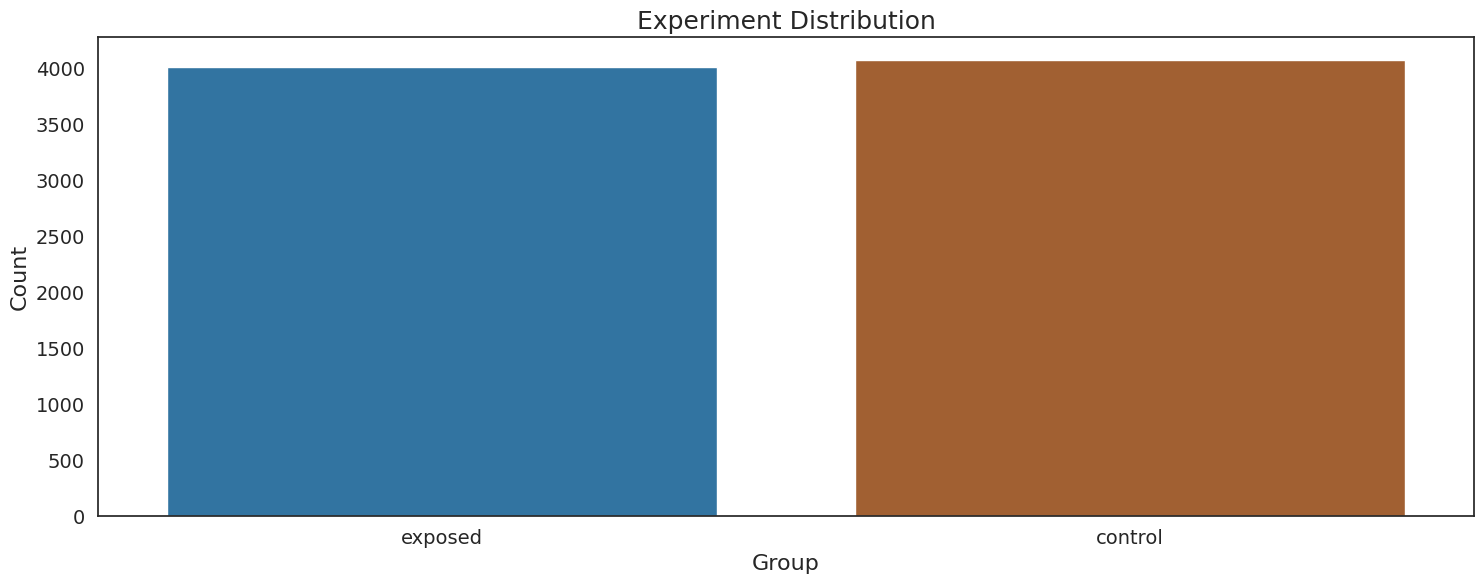

In [31]:
graphs.countplots(df      = ab,
                  columns = ["experiment"],
                  titles  = ["Experiment Distribution"],
                  labels  = ["Group"],
                  ylabel  = "Count",
                  dim     = (15,6),
                  palette = ["#1F77B4","#B45D1F"],
                  row     = 1,
                  col     = 1)

Our groups aren't exactly equal, but it's close enough. The difference in sizing is likely due to the effect of subsetting the dataframe earlier.

<a id="4c"></a>
### Experiment By Response

In [32]:
# pg.color_scheme(c_type="triadic")

# The triadic colors are: rgb(31,119,180), rgb(118,180,31), rgb(180,31,118).
# The triadic colors are: #1F77B4, #B41F76, #76B41F

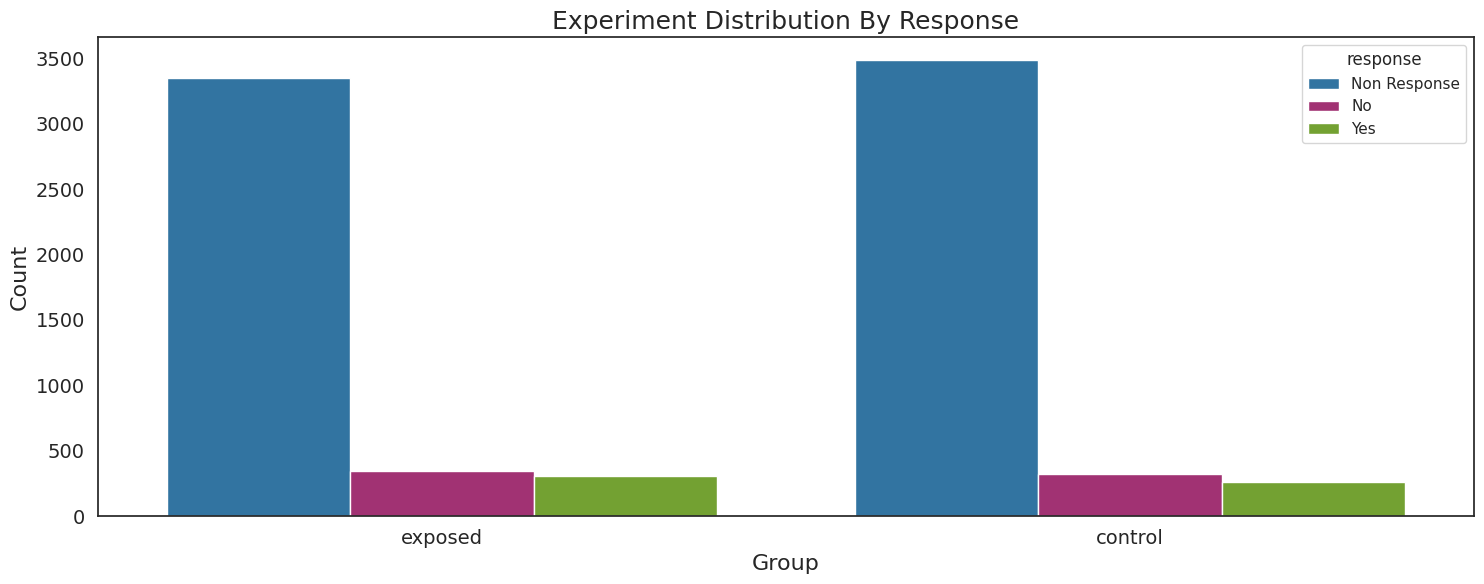

In [33]:
graphs.countplots(df      = ab,
                  columns = ["experiment"],
                  titles  = ["Experiment Distribution By Response"],
                  labels  = ["Group"],
                  ylabel  = "Count",
                  dim     = (15,6),
                  hue     = "response",
                  palette = ["#1F77B4","#B41F76","#76B41F"],
                  row     = 1,
                  col     = 1)

The ratio response/no response ratio between the two groups seems similar at a cursory glance.

[Section Top](#Visualization)

[Top](#Table-Of-Contents)

<a id="4d"></a>
### Response

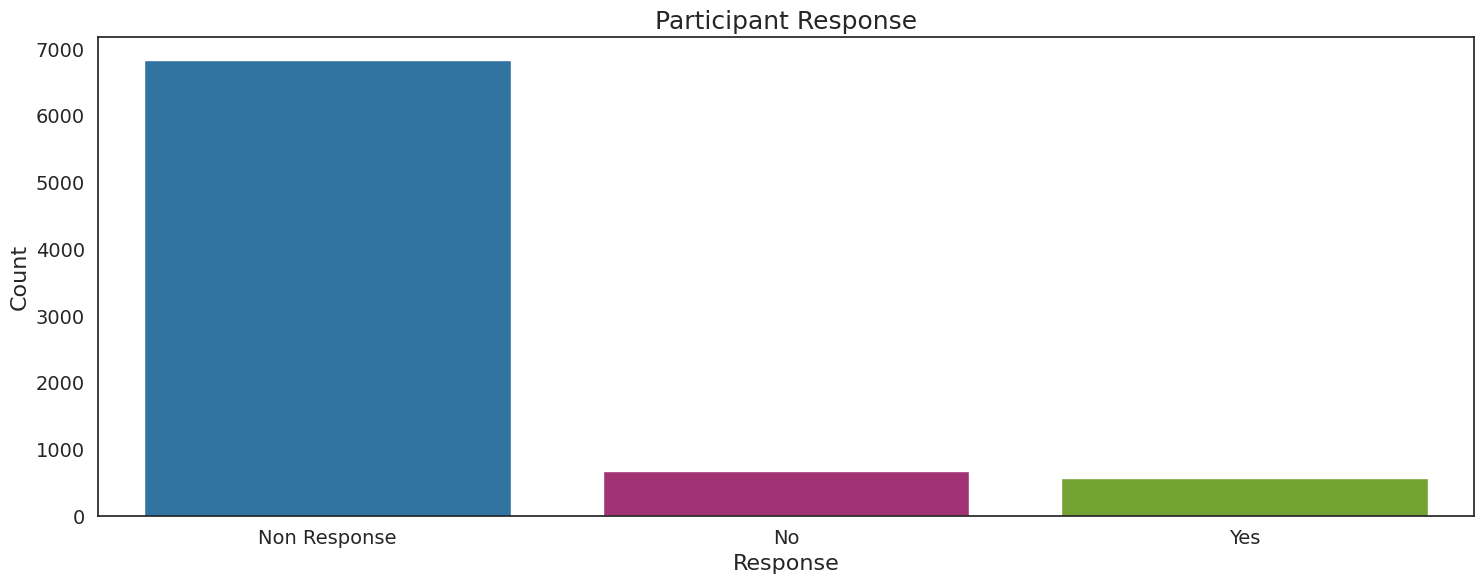

In [34]:
graphs.countplots(df      = ab,
                  columns = ["response"],
                  titles  = ["Participant Response"],
                  labels  = ["Response"],
                  ylabel  = "Count",
                  palette = ["#1F77B4","#B41F76","#76B41F"],
                  dim     = (15,6),
                  row     = 1,
                  col     = 1)

As we've seen, only ~15% of total experiment participants actually responded.

<a id="4e"></a>
### Experiment Date

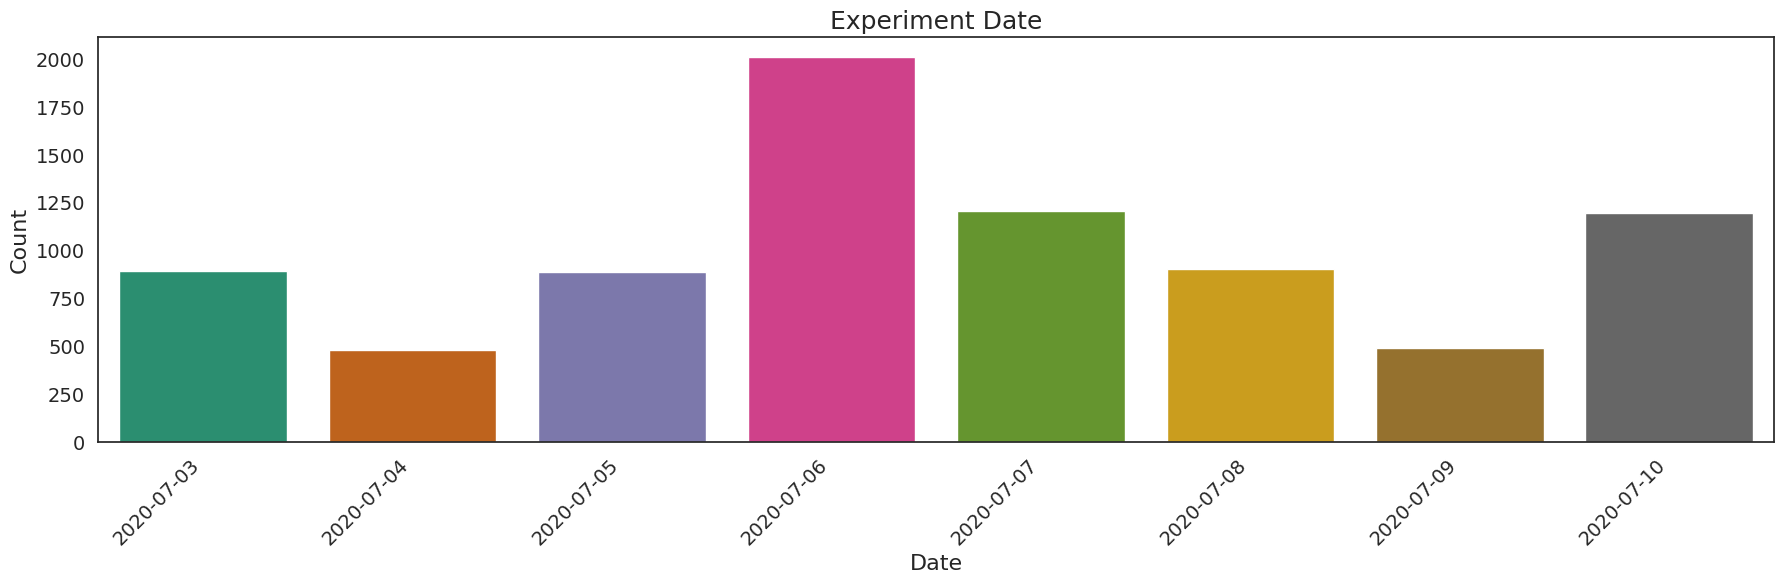

In [35]:
graphs.countplots_dt(df      = ab,
                     columns = ["date"],
                     titles  = ["Experiment Date"],
                     labels  = ["Date"],
                     ylabel  = "Count",
                     palette = "Dark2",
                     dim     = (18,6),
                     row     = 1,
                     col     = 1)

We check a calendar for July 2020:

| Month | Day | Day Of Week |
|:-----:|:---:|:------------|
| July  | 3   | Friday      |
| July  | 4   | Saturday    |
| July  | 5   | Sunday      |
| July  | 6   | Monday      |
| July  | 7   | Tuesday     |
| July  | 8   | Wednesday   |
| July  | 9   | Thursday    |
| July  | 10  | Friday      |

One of the problems with having an experiment that ran for <2 weeks is that we cannot be sure if we can take into account changes in traffic caused by weekend vs weekday browsing. Additionally, we are working on a subset of the overall data set which could be introducing other biases.

Aditionally there is a spike on July 6th, which may be indicative of a bias in the data

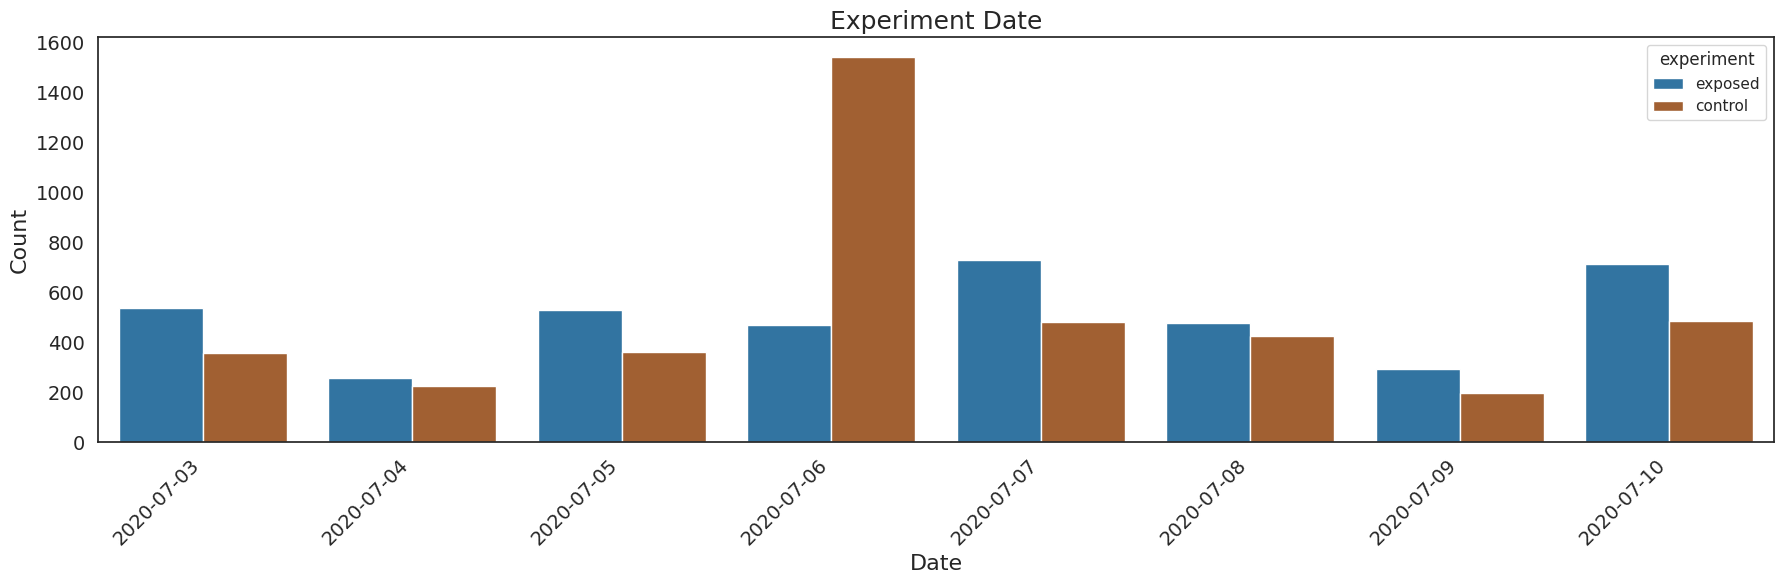

In [36]:
graphs.countplots_dt(df      = ab,
                     columns = ["date"],
                     titles  = ["Experiment Date"],
                     labels  = ["Date"],
                     ylabel  = "Count",
                     palette = ["#1F77B4","#B45D1F"],
                     hue     = "experiment",
                     dim     = (18,6),
                     row     = 1,
                     col     = 1)

When dividing the date further by experiment group, we can see the spike is only present in the control population.

[Section Top](#Visualization)

[Top](#Table-Of-Contents)

<a id="4f"></a>
### Experiment Hour

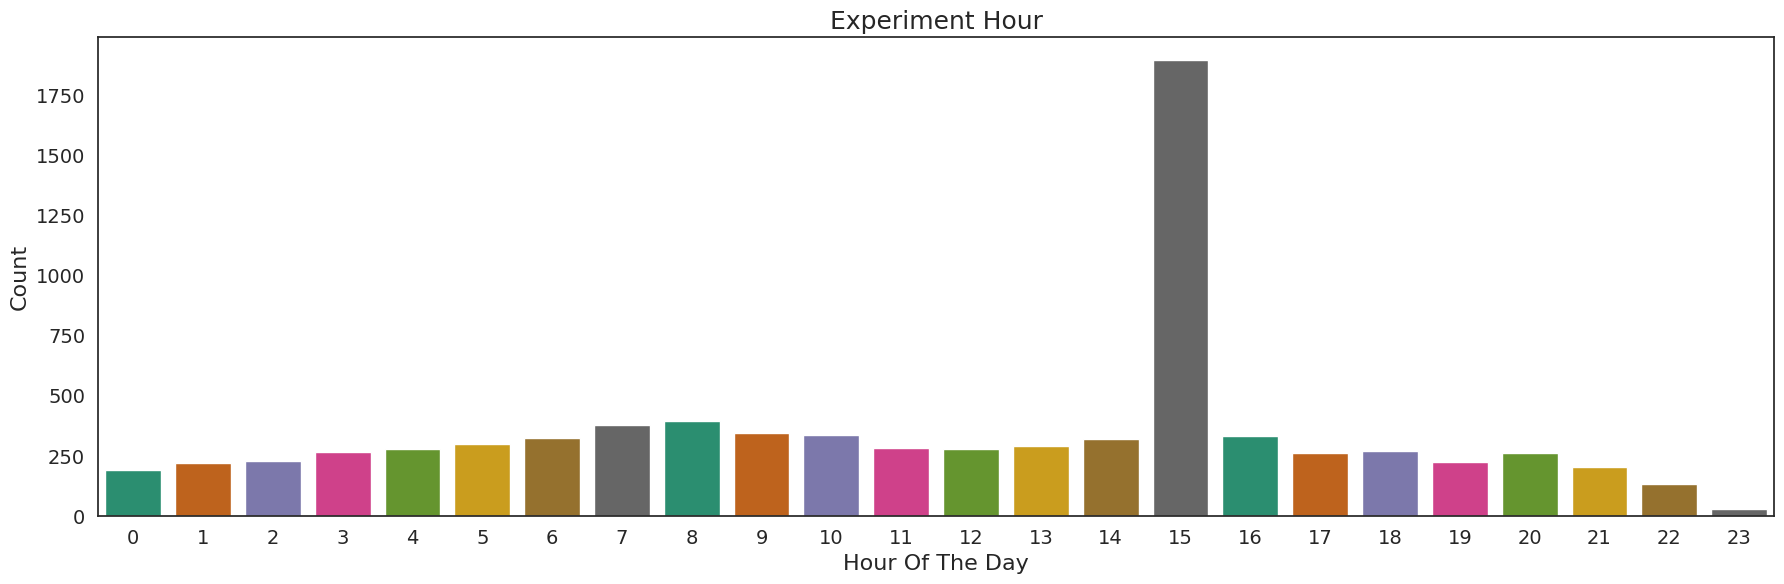

In [37]:
graphs.countplots(df      = ab,
                  columns = ["hour"],
                  titles  = ["Experiment Hour"],
                  labels  = ["Hour Of The Day"],
                  ylabel  = "Count",
                  palette = "Dark2",
                  dim     = (18,6),
                  row     = 1,
                  col     = 1)

We don't have the full picture of the data, but the spike in IDs during 15:00 is interesting to us: we expected to see a peak in the afternoon, but that may be due to not having the full data set.

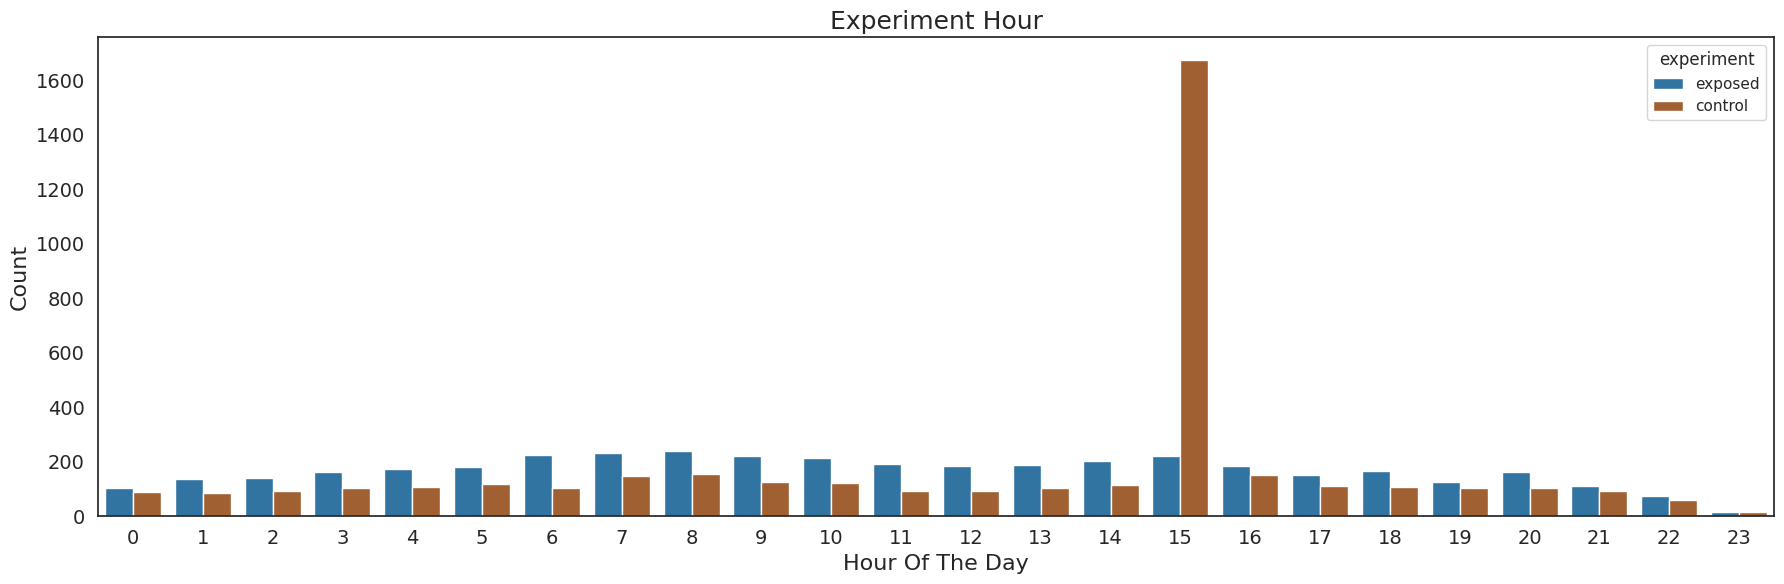

In [38]:
graphs.countplots(df      = ab,
                  columns = ["hour"],
                  titles  = ["Experiment Hour"],
                  labels  = ["Hour Of The Day"],
                  ylabel  = "Count",
                  palette = ["#1F77B4","#B45D1F"],
                  hue     = "experiment",
                  dim     = (18,6),
                  row     = 1,
                  col     = 1)

Drilling down further, we can see that the anomaly at 15:00 is only in the control group, which is similar to the spike we saw in the control group for July 6th.

[Section Top](#Visualization)

<a id="4g"></a>
### Device Make

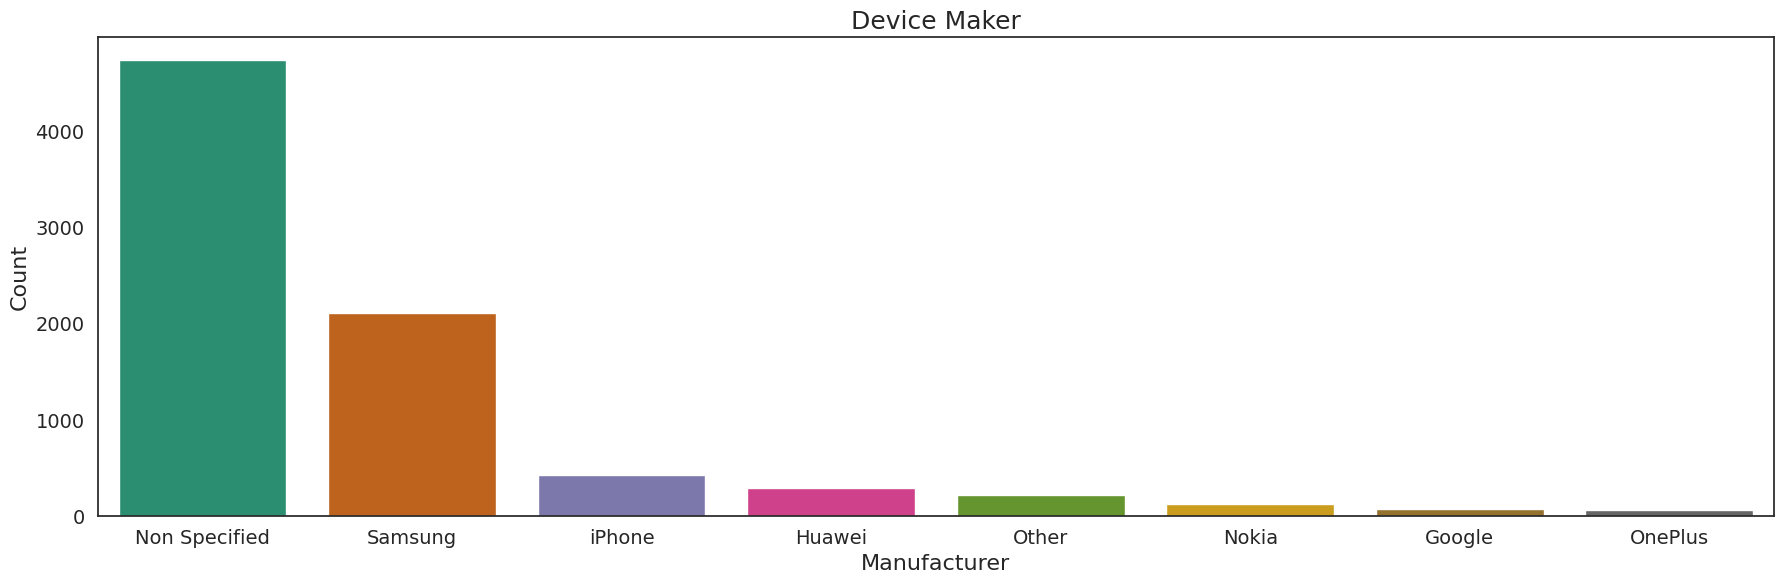

In [39]:
# Update mapping
graphs.countplots_order(df      = ab,
                        columns = ["device_clean"],
                        titles  = ["Device Maker"],
                        labels  = ["Manufacturer"],
                        ylabel  = "Count",
                        palette = "Dark2",
                        dim     = (18,6),
                        row     = 1,
                        col     = 1)

This isn't the most helpful column as the majority of the maker is non-specified. If we were modeling rather than A/B testing, we would consider dropping the column.

<a id="4h"></a>
### Operating System

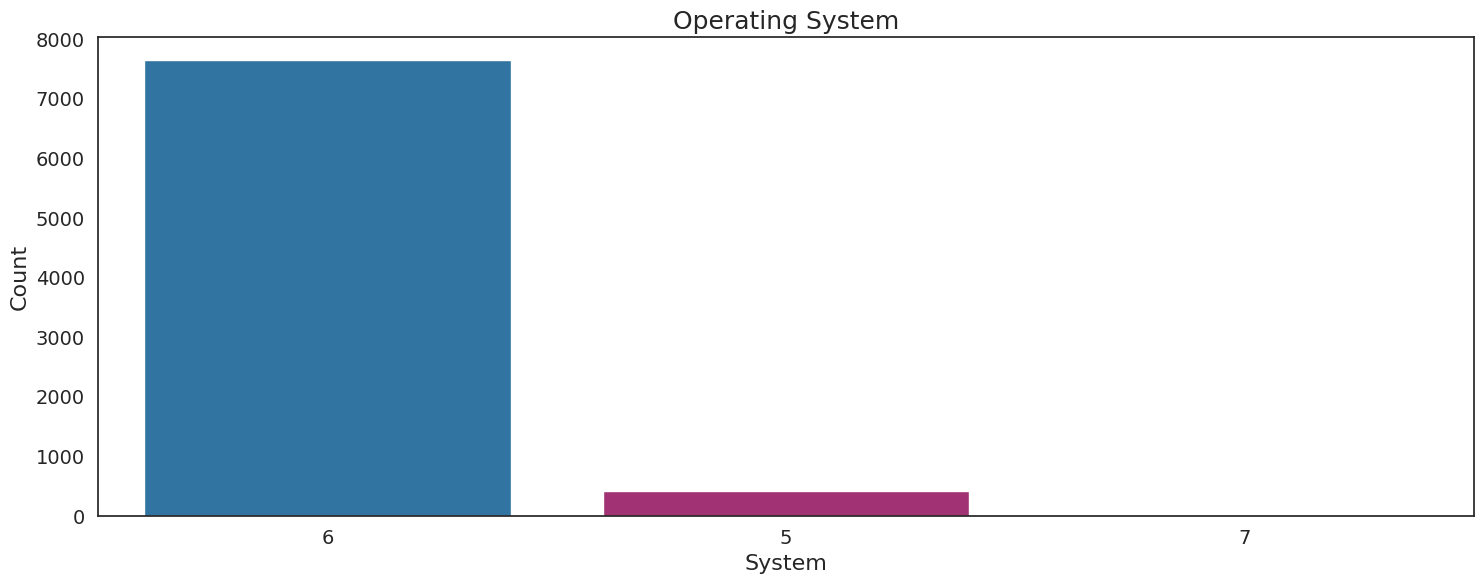

In [40]:
graphs.countplots_order(df      = ab,
                        columns = ["platform_os"],
                        titles  = ["Operating System"],
                        labels  = ["System"],
                        ylabel  = "Count",
                        palette = ["#1F77B4","#B41F76","#76B41F"],
                        dim     = (15,6),
                        row     = 1,
                        col     = 1)

- There is exactly 1 value for `7`.

- The author does not provide information what operating systems are encoded by `5`, `6`, and `7`.

<a id="4i"></a>
### Browser

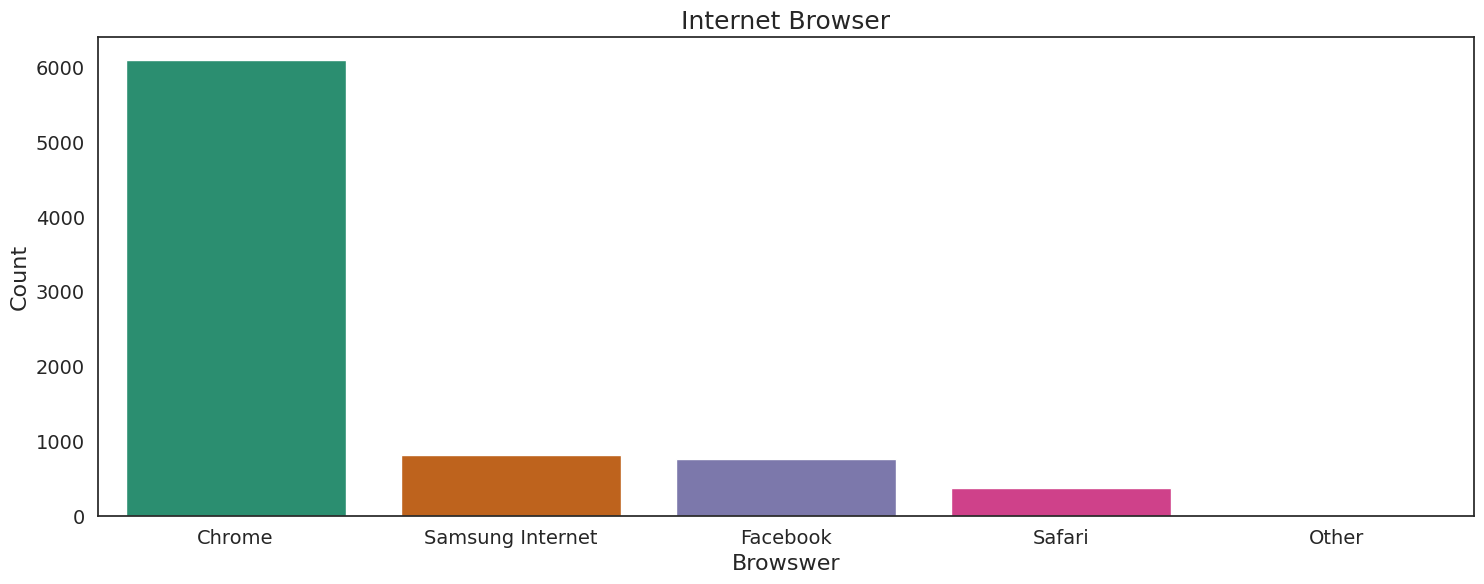

In [41]:
# Address nulls
graphs.countplots_order(df      = ab,
                        columns = ["browser_clean"],
                        titles  = ["Internet Browser"],
                        labels  = ["Browswer"],
                        ylabel  = "Count",
                        palette = "Dark2",
                        dim     = (15,6),
                        row     = 1,
                        col     = 1)

- There are 11 values for `Other`: we grouped single digit count values into one category to make the visual neater.

-  No surprises here, Chrome is the most popular mobile browser worldwide; though we were expecting to see more Safari. Again, this is a susbet of the data so overall trends may be different.

[Section Top](#Visualization)

[Top](#Table-Of-Contents)